<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/Taller3Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Subir la imagen desde tu dispositivo
uploaded = files.upload()

Saving FotoFalcao.jpg to FotoFalcao (1).jpg


In [ ]:
# Obtener el nombre del archivo subido
file_name = next(iter(uploaded))

# Leer la imagen con OpenCV
image = cv2.imread(file_name)

# Convertir de BGR (formato de OpenCV) a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

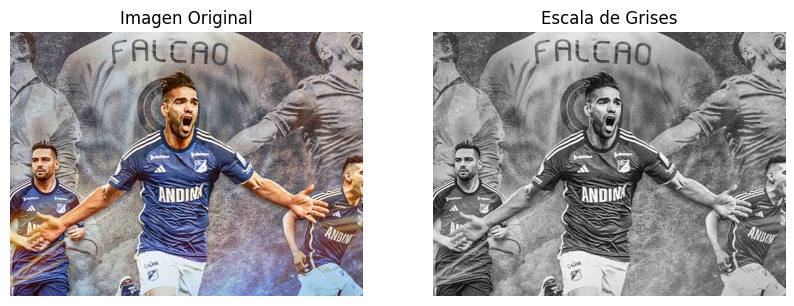

In [ ]:
plt.figure(figsize=(10, 5))

# Imagen original (en RGB)
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis("off")

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Escala de Grises")
plt.axis("off")

plt.show()

Saving FotoFalcao.jpg to FotoFalcao (2).jpg


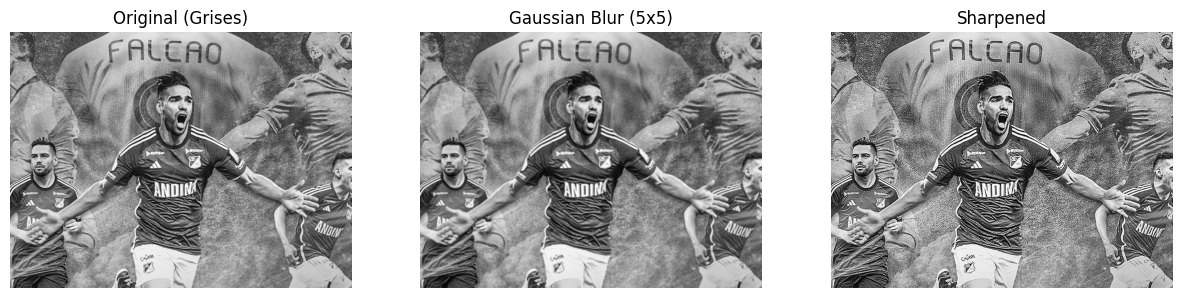

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Subir imagen
uploaded = files.upload()
file_name = next(iter(uploaded))

# Leer imagen y convertir a escala de grises
image = cv2.imread(file_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar filtros convolucionales
# ----------------------------------------------
# 1. Filtro de desenfoque (Gaussian Blur)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 2. Filtro de enfoque (Sharpening)
# Crear kernel de enfoque (sharpening)
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharpened_image = cv2.filter2D(gray_image, -1, sharpening_kernel)
# ----------------------------------------------

# Mostrar resultados
plt.figure(figsize=(15, 5))

# Imagen original en grises
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original (Grises)")
plt.axis("off")

# Imagen con desenfoque
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blur (5x5)")
plt.axis("off")

# Imagen enfocada
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened")
plt.axis("off")

plt.show()

Saving FotoFalcao.jpg to FotoFalcao (3).jpg


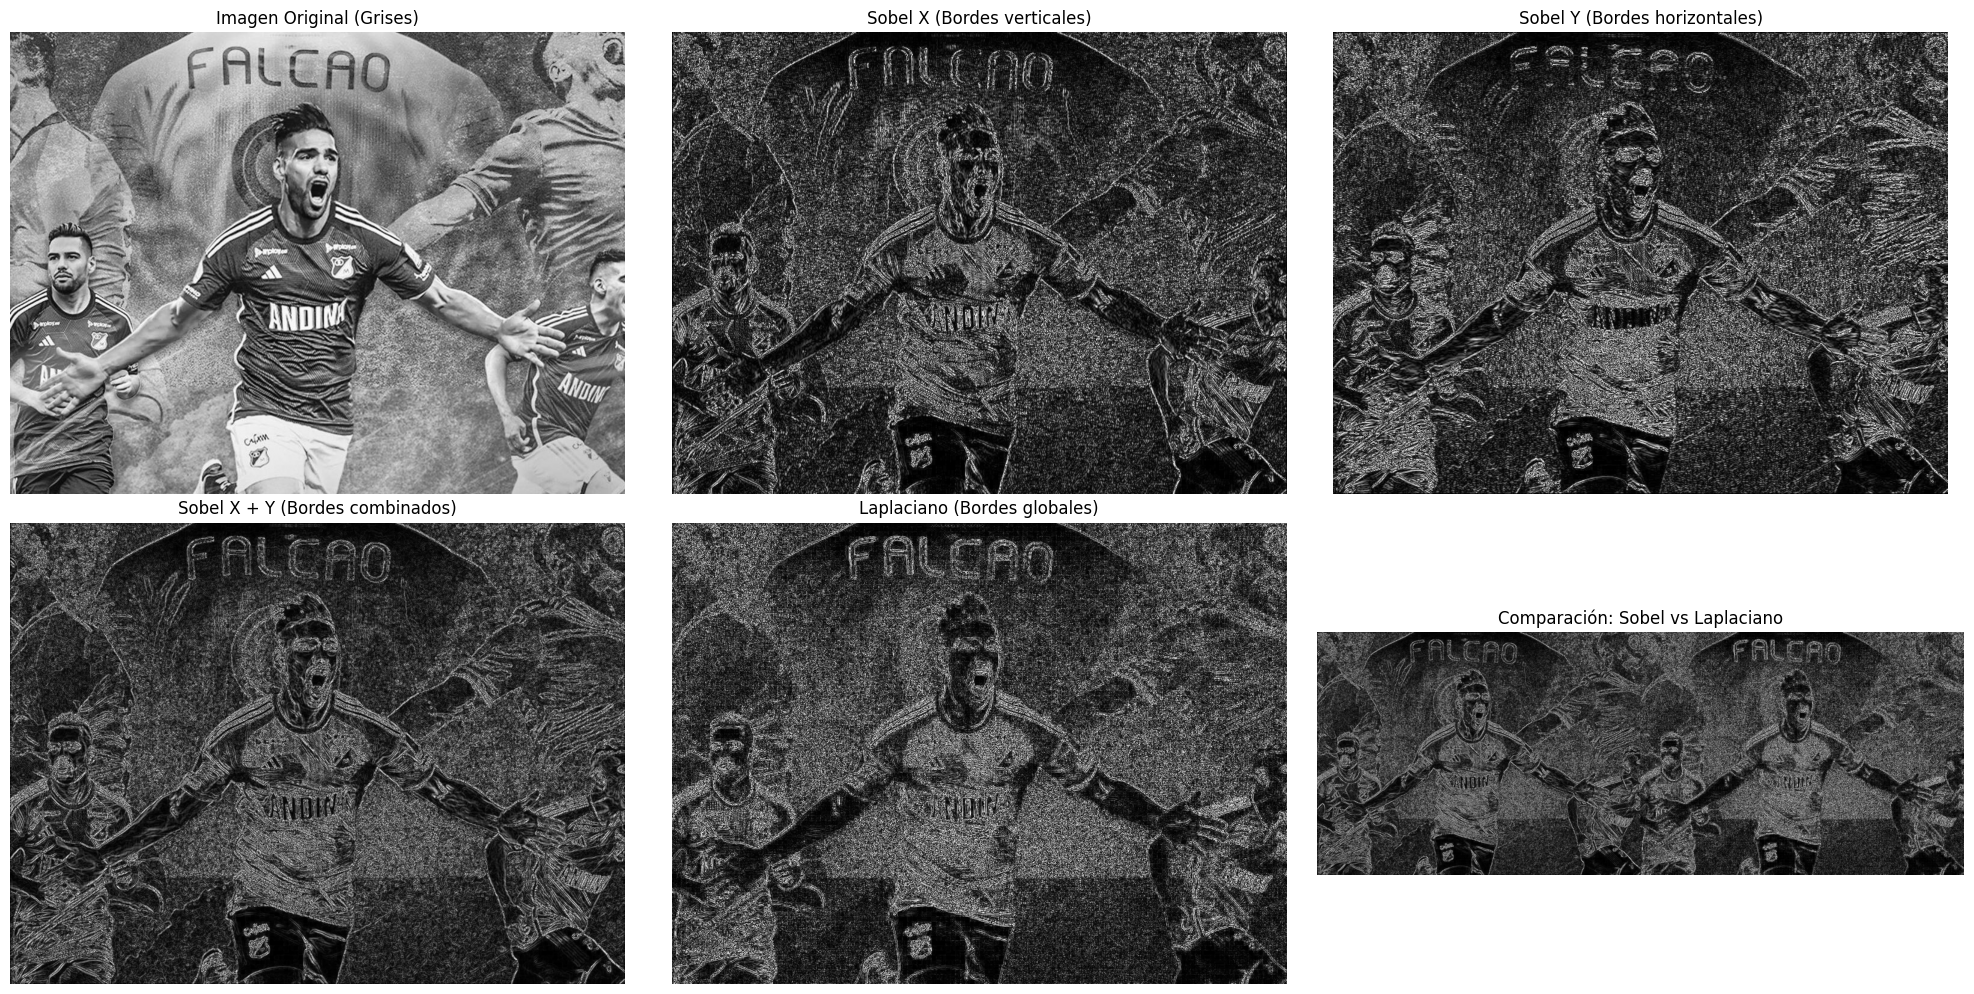

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Subir imagen
uploaded = files.upload()
file_name = next(iter(uploaded))

# Leer imagen y convertir a escala de grises
image = cv2.imread(file_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar filtros de detección de bordes
# ----------------------------------------------------------------
# 1. Sobel en dirección X (detección de bordes verticales)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))  # Convertir a valor absoluto

# 2. Sobel en dirección Y (detección de bordes horizontales)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = np.uint8(np.absolute(sobel_y))

# 3. Combinación de Sobel X y Y
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# 4. Filtro Laplaciano (detección de bordes en todas las direcciones)
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F, ksize=3)
laplacian = np.uint8(np.absolute(laplacian))
# ----------------------------------------------------------------

# Visualización con matplotlib
plt.figure(figsize=(20, 10))

# Imagen original en grises
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagen Original (Grises)")
plt.axis("off")

# Sobel X
plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X (Bordes verticales)")
plt.axis("off")

# Sobel Y
plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y (Bordes horizontales)")
plt.axis("off")

# Sobel Combinado
plt.subplot(2, 3, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel X + Y (Bordes combinados)")
plt.axis("off")

# Laplaciano
plt.subplot(2, 3, 5)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplaciano (Bordes globales)")
plt.axis("off")

# Comparación lado a lado
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(cv2.hconcat([
    sobel_combined,
    laplacian
]), cv2.COLOR_BGR2RGB))
plt.title("Comparación: Sobel vs Laplaciano")
plt.axis("off")

plt.tight_layout()
plt.show()